# **Data Modelling and Evaluation**

---

## Objectives

* Answer business requirement 2: 
    * The client seeks to predict whether a cherry leaf is healthy or infected with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train
* inputs/cherry_leaves_dataset/cherry-leaves/test
* inputs/cherry_leaves_dataset/cherry-leaves/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file





## Additional Comments:

N/A


---

## 1. Set Data Directory and Import Libraries

---

Import libraries

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


---

## 2. Set working directory

---

In [18]:
cwd= os.getcwd()

In [19]:
os.chdir('/workspace/Portfolio_5_Cherry_Leaves_Mildew')
print("You set a new current directory")

You set a new current directory


In [20]:
work_dir = os.getcwd()
work_dir

'/workspace/Portfolio_5_Cherry_Leaves_Mildew'

---

## 3. Set input directories (Train, Validation, Test)

---

Set train, validation and test paths.

In [21]:
base_dir = '/workspace/Portfolio_5_Cherry_Leaves_Mildew/inputs/cherry_leaves_dataset/cherry-leaves'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


---

## 4. Set output directory

---

In [28]:

version = 'v1'
base_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'  # Make sure to set your base directory
file_path = os.path.join(base_dir, 'outputs', version)

# Function to automatically increment version
def increment_version(ver):
    base, num = ver[:-1], int(ver[-1])  # Assumes version format is vX where X is a digit
    return f"{base}{num + 1}"

# Check if 'outputs' directory exists, if not, create it
if 'outputs' not in os.listdir(base_dir):
    os.makedirs(os.path.join(base_dir, 'outputs'))

# Check if the specific version exists
if version in os.listdir(os.path.join(base_dir, 'outputs')):
    print('Old version is already available. Creating a new version...')
    # Increment the version until a new, unused version is found
    while version in os.listdir(os.path.join(base_dir, 'outputs')):
        version = increment_version(version)
    # Create a new version directory
    new_file_path = os.path.join(base_dir, 'outputs', version)
    os.makedirs(new_file_path)
    print(f"New version created: {version}")
else:
    # If the version doesn't exist, create the specified version directory
    os.makedirs(file_path)
    print(f"Version {version} created.")



Version v1 created.


---

## 5. Set label names

---

Set labels

In [29]:
labels = os.listdir(train_dir)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

## 6. Set image shape

---

Import saved image shape embedding

In [30]:
import joblib

version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(50, 50)

---

## 7. Load Images from Train, Test, and Validation Sets

---

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Note that validation data should not be augmented!

In [36]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

Found 634 images belonging to 2 classes.


In [37]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

Found 2944 images belonging to 2 classes.


In [38]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

Found 630 images belonging to 2 classes.


---

## 8. Image Data Augmentation

---

Import ImageDataGenerator

* Intiatize ImageDataGenerator

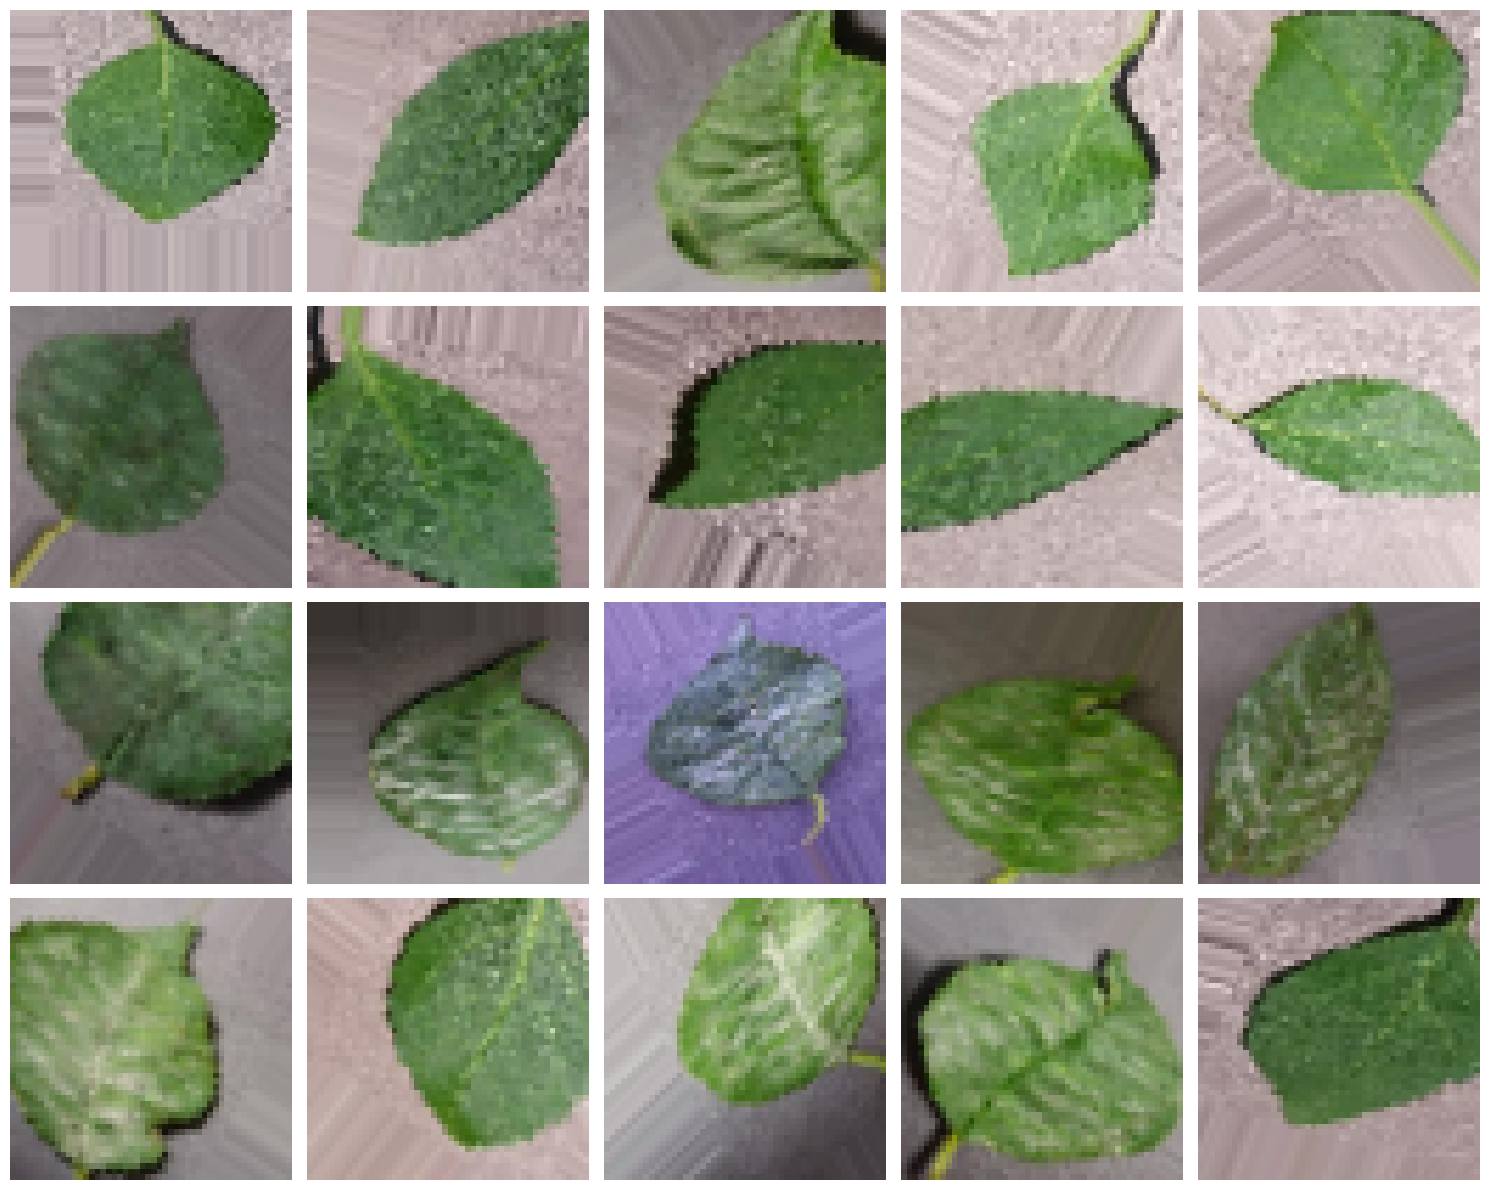

In [41]:
def plot_augmented_images(image_gen, num_images=20):
    """
    Plots a grid of `num_images` from an image generator.
    
    :param image_gen: The image generator object.
    :param num_images: The number of images to plot.
    """
    images, _ = next(image_gen)  # Get a batch of images and labels
    
    # Calculate grid size and create a new figure
    n_cols = 5  # Number of columns in the grid
    n_rows = num_images // n_cols + (num_images % n_cols > 0)  # Calculate required rows
    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    
    for i in range(num_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i])  # Images are already rescaled by the generator
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot augmented train images
plot_augmented_images(train_generator, num_images=20)


* Augment test image dataset

In [46]:
def plot_test_images(directory_iterator, num_images=10):
    """
    Plots a specified number of test images from a DirectoryIterator.
    
    :param directory_iterator: A DirectoryIterator yielding batches of images and labels.
    :param num_images: The number of test images to plot.
    """
    # Get a batch of images and labels using next()
    images, _ = next(directory_iterator)
    
    # Determine the grid size for plotting
    n_cols = min(num_images, 5)  # Adjust the number of columns as needed, maxing out at 5
    n_rows = num_images // n_cols + (num_images % n_cols > 0)
    
    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    
    for i in range(min(num_images, len(images))):  # Ensure we do not exceed the batch size or num_images
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


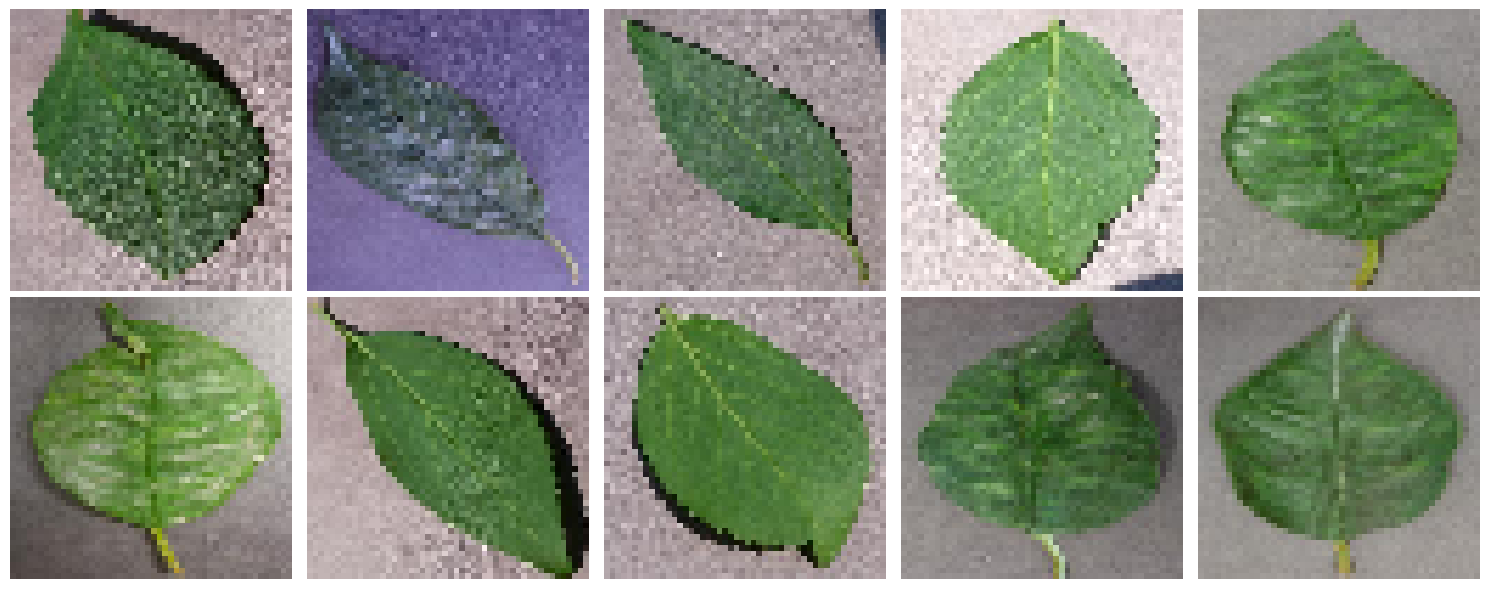

In [45]:
# Assuming test_generator is your DirectoryIterator instance
plot_test_images(test_generator, num_images=10)


* Augment train image dataset

In [49]:

def plot_train_images(generator, num_images=8):
    """
    Plots a batch of images from the given generator.
    
    :param generator: The generator yielding batches of images and labels.
    :param num_images: The number of images to plot from a single batch.
    """
    images, labels = next(generator)  # Get a batch of images and labels

    n_cols = min(num_images, 4)  # Number of columns in the plot
    n_rows = num_images // n_cols + int(num_images % n_cols != 0)  # Calculate required number of rows

    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    for i in range(num_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


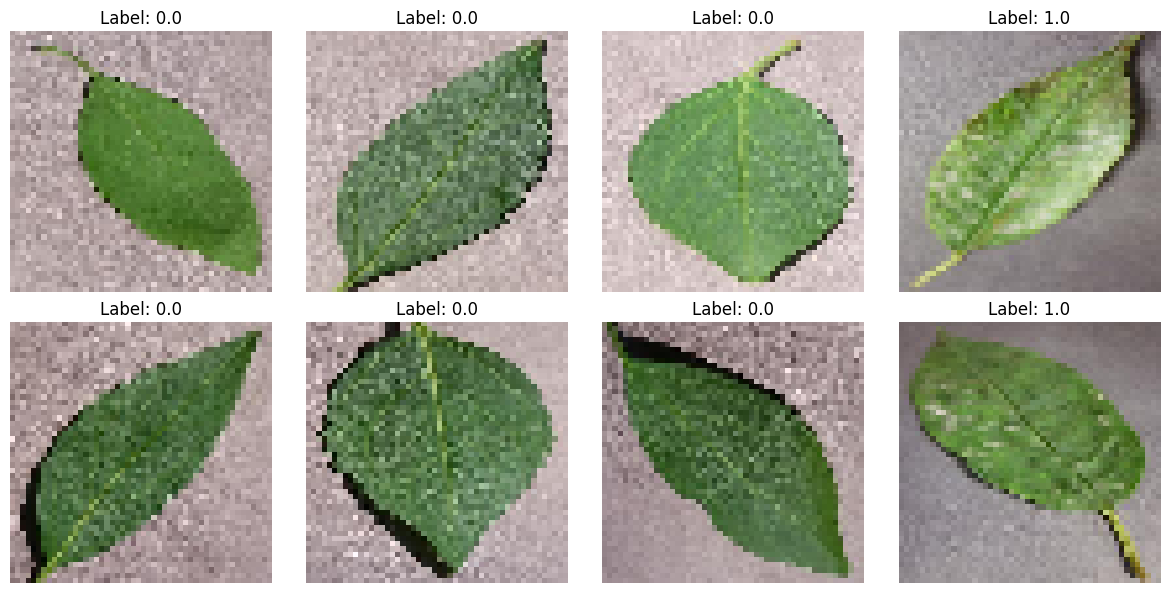

In [50]:
plot_train_images(validation_generator, num_images=8)


* Augment validation image dataset

In [47]:
def plot_validation_images(generator, num_images=8):
    """
    Plots a batch of images from the given generator.
    
    :param generator: The generator yielding batches of images and labels.
    :param num_images: The number of images to plot from a single batch.
    """
    images, labels = next(generator)  # Get a batch of images and labels

    n_cols = min(num_images, 4)  # Number of columns in the plot
    n_rows = num_images // n_cols + int(num_images % n_cols != 0)  # Calculate required number of rows

    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    for i in range(num_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


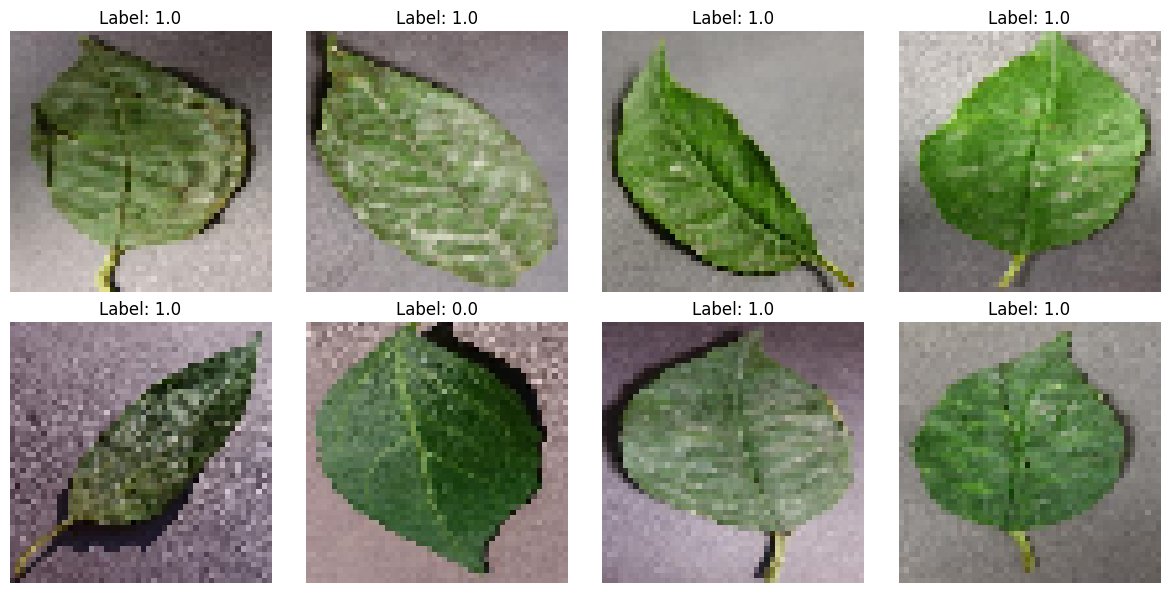

In [48]:
plot_validation_images(validation_generator, num_images=8)


---

## 9. Save Class Indices

---

In [51]:
class_indices = {'healthy': 0, 'powdery_mildew': 1} 

# Save the class indices to a file using joblib or any other suitable method
joblib.dump(class_indices, f'{file_path}/class_indices.pkl')

['inputs/cherry_leaves_dataset/cherry-leaves/outputs/v1/class_indices.pkl']

---

## 10. Model Creation and Training

---

Advanced model and hyperparameter tuning using GridSearchCV


* Prepare Data

In [52]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # total_train_images // batch_size
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # total_validation_images // batch_size
      callbacks=[early_stopping],
      verbose=2)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_2/Relu' defined at (most recent call last):
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/gitpod/.pyenv/versions/3.8.18/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_140064/3894405355.py", line 19, in <module>
      history = model.fit(
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_2/Relu'
Matrix size-incompatible: In[0]: [20,2048], In[1]: [36992,512]
	 [[{{node sequential_1/dense_2/Relu}}]] [Op:__inference_train_function_3117]

* Define the Model

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

---

## 11. Save the Model


---

 Save the trained RandomForestClassifier using joblib

---

## 12. Plot Learning Curve for Model Performance

---

### Model learning curve

In [ ]:
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot the learning curve for your best_model
plt.figure(figsize=(12, 6))
plot_learning_curve(best_model, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

# Save the learning curve plot
learning_curve_filename = f'{file_path}/learning_curve.png'
plt.savefig(learning_curve_filename, bbox_inches='tight', dpi=150)
plt.show()


---

## 13. Model Evaluation on Test Data

---

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the trained model
best_model = joblib.load(model_filename)


# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=labels)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


---

## 14. Prediction on a Random Image File

---

Load a random image as PIL

Convert image to array and prepare for prediction

Predict class probabilities

---

## 15. Push Files to Repo (Git Commands)

---

#### Push generated/new files from this Session to GitHub repo

* .gitignore

In [ ]:
!cat .gitignore

* Git status

In [ ]:
!git status

* Git add

In [ ]:
!git add .

* Git commit

In [ ]:
!git commit -am " Add new plots- test run"

* Git Push

In [ ]:
!git push